In [30]:
import pandas as pd
# import numpy as np
import os
import glob
import matplotlib.pyplot as plt
# from sklearn import linear_model
# from scipy import stats
import seaborn as sns
# import altair as alt

In [90]:
albedoPath = r"randomPoints\2m\albedo"
demPath = r"randomPoints\2m\dem"
# albedoPath = r"randomPoints\30m\albedo"
# demPath = r"randomPoints\30m\dem"
# albedoPath = r"randomPoints\30mNofilter\albedo"
# demPath = r"randomPoints\30mNofilter\dem"
# albedoPath = r"randomPoints\90m\albedo"
# demPath = r"randomPoints\90m\dem"
# albedoPath = r"randomPoints\90mNofilter\albedo"
# demPath = r"randomPoints\90mNofilter\dem"


# albedoPath = r"randomPoints\modis30m\albedo"
# demPath = r"randomPoints\modis30m\dem"

searchCriteria = "*.csv"

globInput = os.path.join(albedoPath, searchCriteria)
albedoCSVpath = glob.glob(globInput)
albedoList = os.listdir(albedoPath)

globInput = os.path.join(demPath, searchCriteria)
demCSVpath = glob.glob(globInput)
demList = os.listdir(demPath)

In [91]:
for i in range(len(albedoList)):
    dfalbedo = pd.read_csv(albedoCSVpath[i])
    dfdem = pd.read_csv(demCSVpath[i])
    dfalbedo.datetime = pd.to_datetime(dfalbedo.datetime)

    # get the average of the dem time
    dfdem.datetime = dfdem[['time', 'time_end']].mean(axis=1)
    dfdem.datetime = pd.to_datetime(dfdem.datetime, unit="ms")
    # time = dfdem.datetime
    # dfdem = dfdem.diff()
    # dfdem['daysdiff'] = dfdem.datetime.dt.days
    # dfdem.datetime = time
    
    # join by datetime
    dfmerge = pd.merge_asof(
        dfalbedo.sort_values('datetime'), 
        dfdem.sort_values('datetime'), 
        on='datetime',
        allow_exact_matches=False, 
        tolerance=pd.Timedelta(days=3),
        direction='nearest'
    ).dropna()
    # dfmerge = dfmerge.groupby("time_y").mean()
    if i==0:
        dfmerge.to_csv('albedo vs arcticdem.csv', mode='w', index=False)
    else:
        dfmerge.to_csv('albedo vs arcticdem.csv', mode='a', index=False, header=False)


In [93]:
df = pd.read_csv("albedo vs arcticdem.csv")
df['datetime'] = pd.to_datetime(df.time_x, unit='ms')
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
# df['elevation diff'] = df.elevation / df.daysdiff
df = df[df.month>5]
df = df[df.slope<20]
# df['logslope'] = np.log(df.slope)
# df["visnirAlbedo"] = df["Snow_Albedo_Daily_Tile"]

In [94]:
sns.set_theme(font="Arial",font_scale=2)

<AxesSubplot:xlabel='visnirAlbedo', ylabel='elevation'>

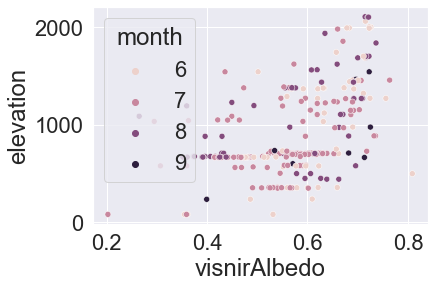

In [95]:
sns.scatterplot(data=df, x="visnirAlbedo", y="elevation", hue="month")

<AxesSubplot:xlabel='visnirAlbedo', ylabel='aspect'>

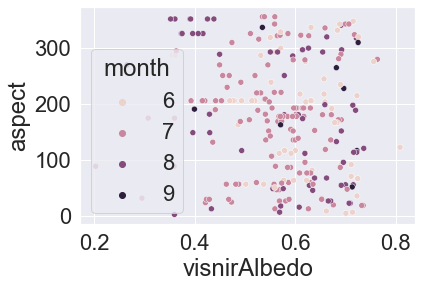

In [96]:
sns.scatterplot(data=df, x="visnirAlbedo", y="aspect", hue="month")

<AxesSubplot:xlabel='visnirAlbedo', ylabel='hillshade'>

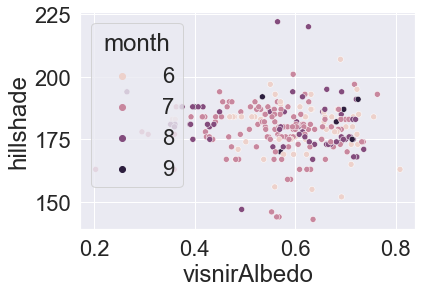

In [97]:
sns.scatterplot(data=df, x="visnirAlbedo", y="hillshade", hue="month")

In [98]:
# sns.set_theme()
# grid = sns.FacetGrid(df, col="month", hue="month", col_wrap=3, height=5)
# grid.map(plt.scatter, "visnirAlbedo", "elevation")

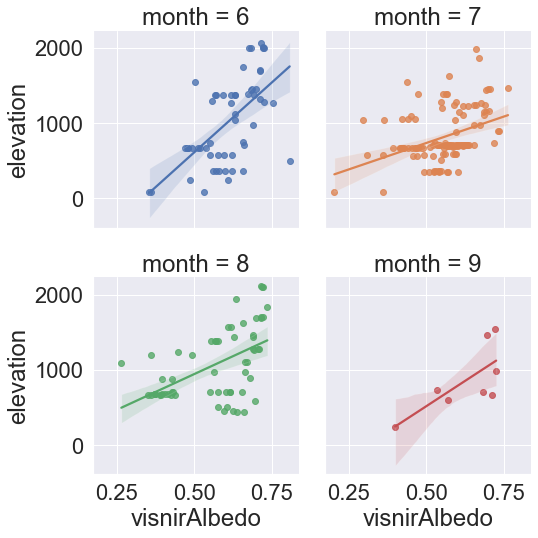

In [99]:
g = sns.lmplot(x="visnirAlbedo", y="elevation", data=df, 
                hue="month", col="month", height=4, col_wrap=2)
g.savefig("print/elevation.png")             

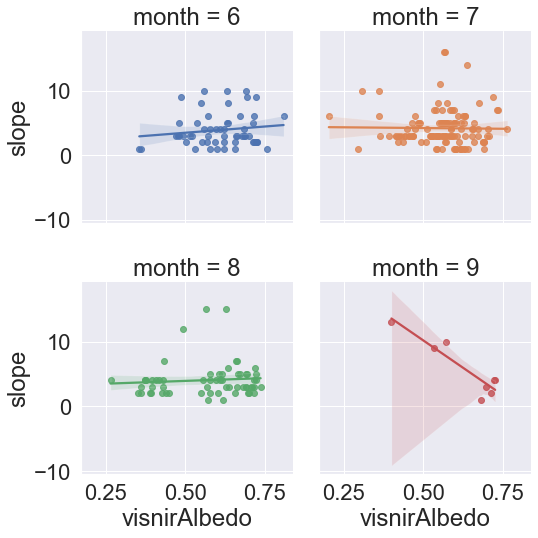

In [100]:
g = sns.lmplot(x="visnirAlbedo", y="slope", data=df, 
                hue="month", col="month", height=4, col_wrap=2)
g.savefig("print/slope.png")   

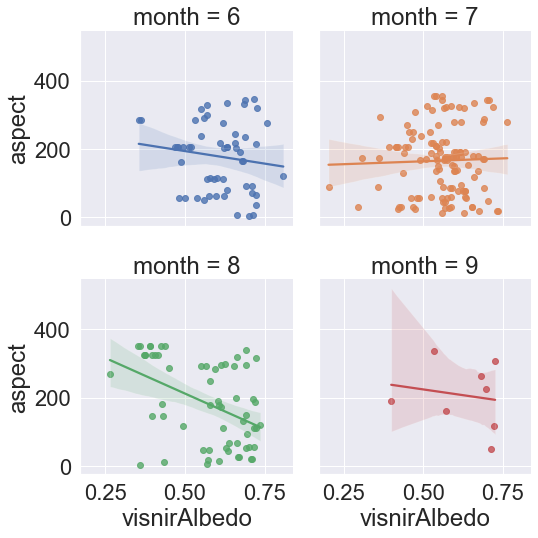

In [101]:
g = sns.lmplot(x="visnirAlbedo", y="aspect", data=df, 
                hue="month", col="month", height=4, col_wrap=2)
g.savefig("print/aspect.png")                

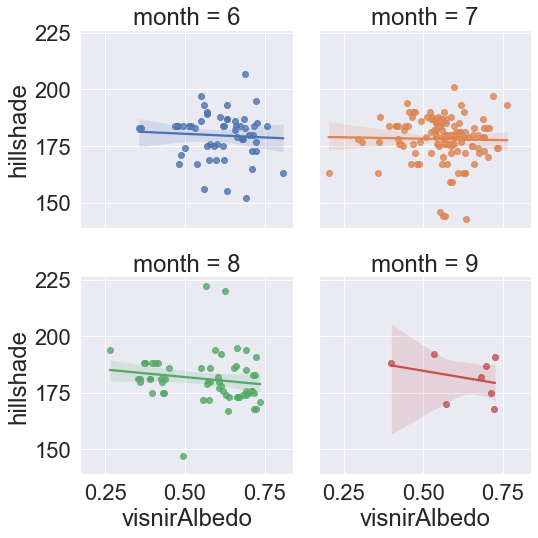

In [102]:
g = sns.lmplot(x="visnirAlbedo", y="hillshade", data=df, 
                hue="month", col="month", height=4, col_wrap=2)
g.savefig("print/hillshade.png")                

In [103]:
# brush = alt.selection(type='interval')
# points = alt.Chart(df).mark_circle().encode(
#     x='visnirAlbedo',
#     y='elevation',
#     color=alt.condition(brush, 'month:N', alt.value('grey')),
#     tooltip=['datetime:T','visnirAlbedo:N','elevation:N','year:N']
# ).add_selection(brush)
# # Base chart for data tables
# ranked_text = alt.Chart(df).mark_text().encode(
#     y=alt.Y('row_number:O',axis=None)
# ).transform_window(
#     row_number='row_number()'
# ).transform_filter(
#     brush
# ).transform_window(
#     rank='rank(row_number)'
# ).transform_filter(
#     alt.datum.rank<40
# )

# # Data Tables
# # stationalt = ranked_text.encode(text='Station').properties(title='station')
# albedoalt = ranked_text.encode(text='visnirAlbedo:N').properties(title='Albedo')
# demalt = ranked_text.encode(text='dem:N').properties(title='dem')
# timealt = ranked_text.encode(text='month:N').properties(title='month')
# text = alt.hconcat(albedoalt, demalt, timealt) # Combine data tables

# # Build chart
# alt.hconcat(
#     points,
#     text
# ).resolve_legend(
#     color="independent"
# )